En este archivo se leeran los datos obtenidos de las caracteristicas propuestas

Se utilizará la librería de PANDAS para realizar este trabajo

C:\Users\Jahzz\AppData\Local\Temp\ipykernel_5520\767863180.py:14: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv(archivo_csv, encoding='latin-1', names=columnas)


Primeras filas del DataFrame:
   Frame     Objeto  Centroide_X  Centroide_Y      Desplazamiento  \
0  Frame     Objeto  Centroide_X  Centroide_Y      Desplazamiento   
1      2  Persona_0          460          272  2.8284271247461903   
2      2  Persona_0          460          272  2.8284271247461903   
3      3  Persona_0          458          278   6.324555320336759   
4      2  Persona_0          460          272  2.8284271247461903   

            Velocidad        Aceleracion               Densidad  \
0           Velocidad        Aceleracion               Densidad   
1    84.8528137423857  533.1232325217602  0.0005798617608529294   
2    84.8528137423857  533.1232325217602  0.0005798617608529294   
3  189.73665961010278  3146.515376031512  0.0005813461444984277   
4    84.8528137423857  533.1232325217602  0.0005798617608529294   

            Direccion   Tiempo_Permanencia   Postura     Permanencia_Area  
0           Direccion   Tiempo_Permanencia   Postura     Permanencia_Area  


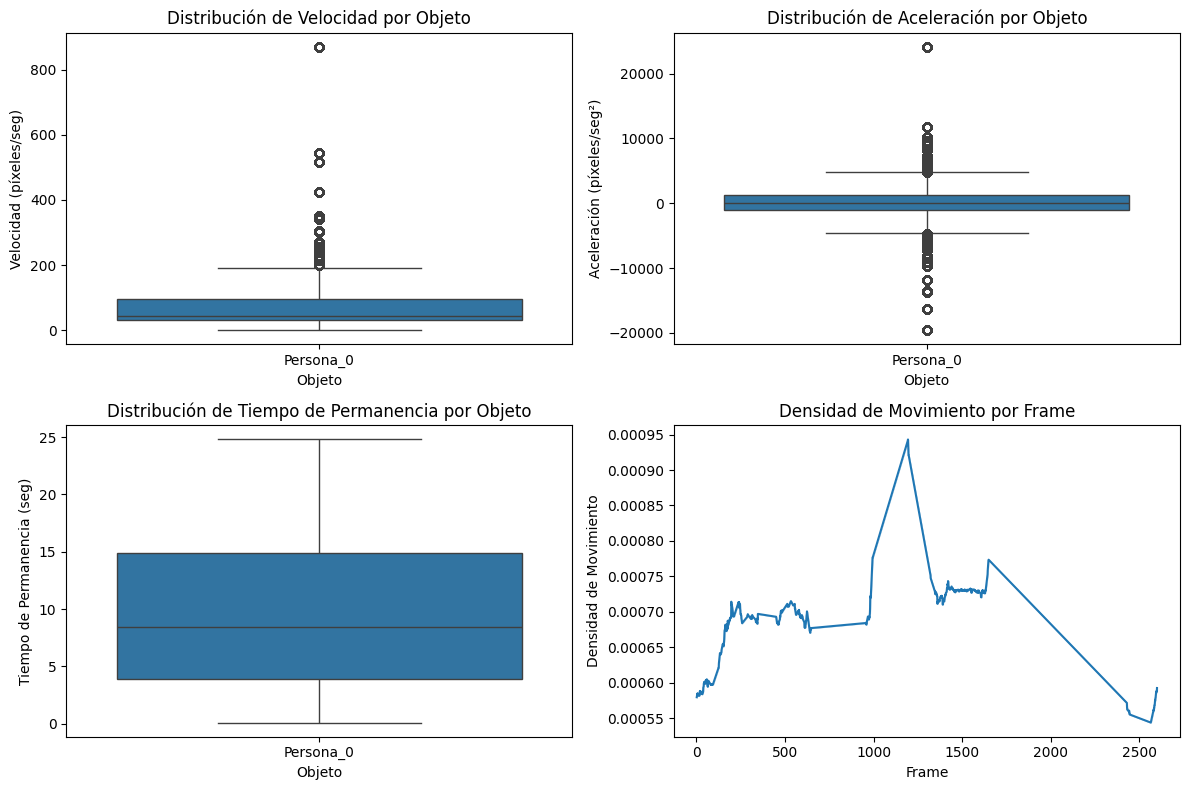


Análisis de dirección del movimiento:
Dirección promedio de Persona_0: 29.60 grados

Análisis de postura:
Postura
Neutral     629755
Vertical    400817
Name: count, dtype: int64


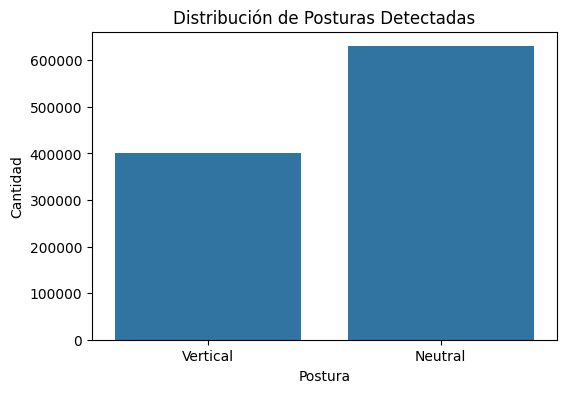


Análisis de permanencia en área:
Permanencia promedio en área de Persona_0: 9.46 seg


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

archivo_csv = r"D:\Documentos\Monitoreo-Comportamientos-Sospechosos\archivooooo.csv"

columnas = [
    "Frame", "Objeto", "Centroide_X", "Centroide_Y", "Desplazamiento", 
    "Velocidad", "Aceleracion", "Densidad", "Direccion", 
    "Tiempo_Permanencia", "Postura", "Permanencia_Area"
]

# Cargar el archivo CSV
datos = pd.read_csv(archivo_csv, encoding='latin-1', names=columnas)
print("Primeras filas del DataFrame:")
print(datos.head())

# Convertir columnas numéricas
columnas_numericas = ["Frame", "Velocidad", "Aceleracion", "Densidad", "Tiempo_Permanencia", "Permanencia_Area", "Direccion"]
for col in columnas_numericas:
    datos[col] = pd.to_numeric(datos[col], errors="coerce")  # Convierte valores no numéricos a NaN

# Eliminar filas con valores NaN en columnas numéricas
datos = datos.dropna(subset=columnas_numericas)

print("\nInformación del DataFrame:")
print(datos.info())

print("\nEstadísticas descriptivas:")
print(datos.describe())

print("\nAnálisis por objeto:")
for objeto in datos["Objeto"].unique():
    print(f"\nDatos para {objeto}:")
    datos_objeto = datos[datos["Objeto"] == objeto]
    print(datos_objeto.describe())

    # Velocidad promedio
    velocidad_promedio = datos_objeto["Velocidad"].mean()
    print(f"Velocidad promedio de {objeto}: {velocidad_promedio:.2f} píxeles/seg")

    # Aceleración promedio
    aceleracion_promedio = datos_objeto["Aceleracion"].mean()
    print(f"Aceleración promedio de {objeto}: {aceleracion_promedio:.2f} píxeles/seg²")

    # Tiempo de permanencia promedio 
    tiempo_promedio = datos_objeto["Tiempo_Permanencia"].mean()
    print(f"Tiempo de permanencia promedio de {objeto}: {tiempo_promedio:.2f} seg")

# Gráficos
plt.figure(figsize=(12, 8))

# Gráfico de velocidad por objeto
plt.subplot(2, 2, 1)
sns.boxplot(x="Objeto", y="Velocidad", data=datos)
plt.title("Distribución de Velocidad por Objeto")
plt.xlabel("Objeto")
plt.ylabel("Velocidad (píxeles/seg)")

# Gráfico de aceleración por objeto
plt.subplot(2, 2, 2)
sns.boxplot(x="Objeto", y="Aceleracion", data=datos)
plt.title("Distribución de Aceleración por Objeto")
plt.xlabel("Objeto")
plt.ylabel("Aceleración (píxeles/seg²)")

# Gráfico de tiempo de permanencia por objeto
plt.subplot(2, 2, 3)
sns.boxplot(x="Objeto", y="Tiempo_Permanencia", data=datos)
plt.title("Distribución de Tiempo de Permanencia por Objeto")
plt.xlabel("Objeto")
plt.ylabel("Tiempo de Permanencia (seg)")

# Gráfico de densidad de movimiento por frame
plt.subplot(2, 2, 4)
sns.lineplot(x="Frame", y="Densidad", data=datos)
plt.title("Densidad de Movimiento por Frame")
plt.xlabel("Frame")
plt.ylabel("Densidad de Movimiento")

plt.tight_layout()
plt.show()

# Análisis de dirección del movimiento
print("\nAnálisis de dirección del movimiento:")
for objeto in datos["Objeto"].unique():
    datos_objeto = datos[datos["Objeto"] == objeto]
    direccion_promedio = datos_objeto["Direccion"].mean()
    print(f"Dirección promedio de {objeto}: {direccion_promedio:.2f} grados")

# Análisis de postura
print("\nAnálisis de postura:")
print(datos["Postura"].value_counts())

# Gráfico de posturas
plt.figure(figsize=(6, 4))
sns.countplot(x="Postura", data=datos)
plt.title("Distribución de Posturas Detectadas")
plt.xlabel("Postura")
plt.ylabel("Cantidad")
plt.show()

# Análisis de permanencia en área
print("\nAnálisis de permanencia en área:")
for objeto in datos["Objeto"].unique():
    datos_objeto = datos[datos["Objeto"] == objeto]
    permanencia_promedio = datos_objeto["Permanencia_Area"].mean()
    print(f"Permanencia promedio en área de {objeto}: {permanencia_promedio:.2f} seg")